In [1]:
# Import packages for working with files and folders
import os
import pathlib

# Import package for working with geospatial vector data
import geopandas as gpd

# Import package for working with tabular data
import pandas as pd

import matplotlib.pyplot as plt

from shapely.geometry import LineString

# Import tool for fiding files by pattern
from glob import glob

import numpy as np

# Import library for making interactive plots with vector/tabular data
import hvplot.pandas 

import panel as pn

import holoviews as hv

### Define Study Area - Load Elwha River Watershed 

In [2]:
# Define project data folder
data_dir = r"C:\Users\nymve\Documents\education\earth-data-analytics\fall-2025\data\WBD_17_HU2_GPKG"

# Make sure the folder exists
os.makedirs(data_dir, exist_ok=True)

# Path to your downloaded GeoPackage
wbd_gpkg_path = os.path.join(data_dir, "WBD_17_HU2_GPKG.gpkg")

# === 3. Load the HUC12 layer ===
wbd_gdf = gpd.read_file(wbd_gpkg_path, layer="WBDHU12")

# Optional: inspect columns and first few rows
print(wbd_gdf.columns)

# Quick look at the first 5 rows
print(wbd_gdf.head())

Index(['tnmid', 'metasourceid', 'sourcedatadesc', 'sourceoriginator',
       'sourcefeatureid', 'loaddate', 'referencegnis_ids', 'areaacres',
       'areasqkm', 'states', 'huc12', 'name', 'hutype', 'humod', 'tohuc',
       'noncontributingareaacres', 'noncontributingareasqkm', 'shape_Length',
       'shape_Area', 'hutype_description', 'geometry'],
      dtype='object')
                                    tnmid  \
0  {0E4E6573-8B28-4F8C-B959-694DE3A9F91C}   
1  {07FD06B3-4536-4B3D-A598-8D646D308101}   
2  {8720D0B0-BEF6-492F-B878-1B0343DB67DD}   
3  {F673354E-0002-4C26-8E80-CFA9C84F31AA}   
4  {546E09D7-5785-4B5B-A284-634E682D7C41}   

                             metasourceid                    sourcedatadesc  \
0  {511D2AC8-11BA-45FC-AB98-F69D693D4C44}  Watershed Boundary Dataset (WBD)   
1  {511D2AC8-11BA-45FC-AB98-F69D693D4C44}  Watershed Boundary Dataset (WBD)   
2  {511D2AC8-11BA-45FC-AB98-F69D693D4C44}  Watershed Boundary Dataset (WBD)   
3  {511D2AC8-11BA-45FC-AB98-F69D693D4C44}

<Axes: >

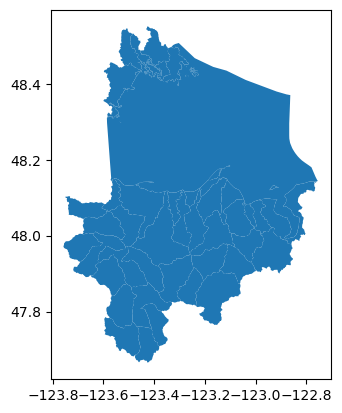

In [3]:
# Filter HUC12s in Elwha HUC8
elwha_gdf = wbd_gdf[wbd_gdf['huc12'].str.startswith("17110020")]

# Rename columns
elwha_gdf = elwha_gdf[['name', 'huc12', 'geometry']].rename(columns={'huc12':'huc'}).set_index('huc')

# Plot the watershed to check data
elwha_gdf.plot()

In [4]:
print(len(elwha_gdf))

39


In [5]:
# Print the names of the selected HUC12s
print(elwha_gdf['name'])

huc
171100200604             Mill Stream-Frontal Esquimalt Harbour
171100200601                  Bowker Creek-Frontal Haro Strait
171100200401                                    McDonald Creek
171100200307                             Lower Dungeness River
171100200102               Beckett Point-Frontal Discovery Bay
171100200403                                       Morse Creek
171100200402                                     Siebert Creek
171100200405           Ennis Creek-Frontal Port Angeles Harbor
171100200603        Craigflower Creek-Frontal Victoria Harbour
171100200103                 Eagle Creek-Frontal Discovery Bay
171100200201                             Jimmycomelately Creek
171100200602                                    Colquitz River
171100200514                          Lake Aldwell-Elwha River
171100200101                Salmon Creek-Frontal Discovery Bay
171100200513                                      Indian Creek
171100200512                          Hughes Creek-

In [6]:
elwha_gdf.head()

,name,geometry
huc,,
171100200604,Mill Stream-Frontal Esquimalt Harbour,"MULTIPOLYGON (((-123.50467 48.54219, -123.5047..."
171100200601,Bowker Creek-Frontal Haro Strait,"MULTIPOLYGON (((-123.30978 48.49501, -123.3094..."
171100200401,McDonald Creek,"POLYGON ((-123.21642 48.12561, -123.21612 48.1..."
171100200307,Lower Dungeness River,"POLYGON ((-123.13045 48.15452, -123.13032 48.1..."
171100200102,Beckett Point-Frontal Discovery Bay,"POLYGON ((-122.75458 48.14432, -122.75436 48.1..."


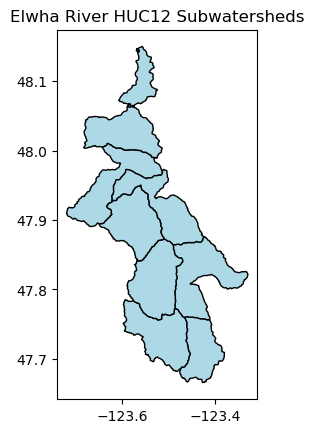

In [7]:
# Filter Elwha HUC12 subwatershed within HUC8 Dungeness-Elwha watershed
elwha_huc12s = [
    "171100200501",
    "171100200502",
    "171100200504",
    "171100200505",
    "171100200507",
    "171100200508",
    "171100200510",
    "171100200512",
    "171100200514",
]

# Create geodataframe and filter for the Elwha HUC12s
elwha_gdf = wbd_gdf[wbd_gdf['huc12'].isin(elwha_huc12s)]

# Select relevant columns and set index
elwha_gdf = elwha_gdf[['name', 'huc12', 'geometry']].rename(columns={'huc12':'huc'}).set_index('huc')

# Plot to check data
elwha_gdf.plot(edgecolor='black', facecolor='lightblue')
plt.title("Elwha River HUC12 Subwatersheds")
plt.show()

In [8]:
# Plot the results with web tile images
elwha_gdf_plot = elwha_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    fill_color=None, line_color='white',
    title='Elwha River Watershed (HUC12)',
    frame_width=500)

# Display the plot with esri imagery
elwha_gdf_plot

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [9]:
# Save plot as html
hv.save(elwha_gdf_plot, 'elwha_watershed_boundary_map.html')

In [10]:
# Check the CRS
print(elwha_gdf.crs)

EPSG:4269


### Load USGS Study Data for Salmon - Before/After Dam Removal

In [11]:
# Define path to salmon count CSV file
data_dir = r"C:\Users\nymve\Documents\education\earth-data-analytics\fall-2025\data"

# Create directory for CSV
salmon_csv_path = os.path.join(data_dir, "Elwha_Riverscape_reach_data.csv")

# Load tabular data
salmon_df = pd.read_csv(salmon_csv_path)

# Look at the columns and first few rows
print(salmon_df.columns)
print(salmon_df.head())

Index(['Reach_ID', 'Reach_Code', 'Reach_Name', 'Year', 'Reach_Length_km',
       'Upstream_Reach_Boundary_rkm', 'Downstream_Reach_Boundary_rkm',
       'Section', 'Count_Saco', 'Count_Onxx', 'Count_Onts', 'Count_Onmy',
       'Fish_km_Saco', 'Fish_km_Onxx', 'Fish_km_Onts', 'Fish_km_Onmy', 'JONTS',
       'JONKI', 'JONXX'],
      dtype='object')
   Reach_ID Reach_Code                      Reach_Name  Year  Reach_Length_km  \
0         1       CCGC       Chicago Camp to Godkin Cr  2007            7.531   
1         2       GCCC     Godkin Cr to Carlson Canyon  2007            3.983   
2         4       HRGR     Hayes River to Goldie River  2007            4.491   
3         5       GRRC  Goldie River to Remann's Cabin  2007            2.375   
4         6       RCLR    Remann's Cabin to Lost River  2007            0.792   

   Upstream_Reach_Boundary_rkm  Downstream_Reach_Boundary_rkm      Section  \
0                    68.626376                      60.823847  Upper Elwha   
1         

In [ ]:
# Select columns for Coho salmon and count
salmon_df = salmon_df[['Reach_ID', 'Reach_Name', 'Year', 'Count_Onts', 'Fish_km_Onts']]

# Rename columns
salmon_df = salmon_df.rename(columns={'Count_Onts':'Chinook_count', 'Fish_km_Onts':'Chinook_per_km'})

# Look at dataframe
salmon_df

,Reach_ID,Reach_Name,Year,Coho_count,Coho_per_km
0,1,Chicago Camp to Godkin Cr,2007,35,4.647457
1,2,Godkin Cr to Carlson Canyon,2007,19,4.770274
2,4,Hayes River to Goldie River,2007,7,1.558673
3,5,Goldie River to Remann's Cabin,2007,1,0.421053
4,6,Remann's Cabin to Lost River,2007,1,1.262626
...,...,...,...,...,...
77,18,McDonald Bridge to HWY 101,2019,3,2.051563
78,19,Aldwell Reach,2019,27,4.649401
79,20,Elwha Dam to HWY 112,2019,2,3.200000
80,21,HWY 112 to One Lane Bridge,2019,0,0.000000


In [28]:
# Create dataframe with Year and Coho_count and Coho_per_km
salmon_year_df = salmon_df[['Year', 'Coho_count', 'Coho_per_km']]

# Group by year: sum counts, mean density
salmon_year_summary = salmon_year_df.groupby('Year', as_index=False).agg({
    'Coho_count': 'sum',
    'Coho_per_km': 'mean'
})

# Display result
print(salmon_year_summary)

   Year  Coho_count  Coho_per_km
0  2007         177     6.064110
1  2008          87     2.527071
2  2018         264     4.416936
3  2019         399     7.010217


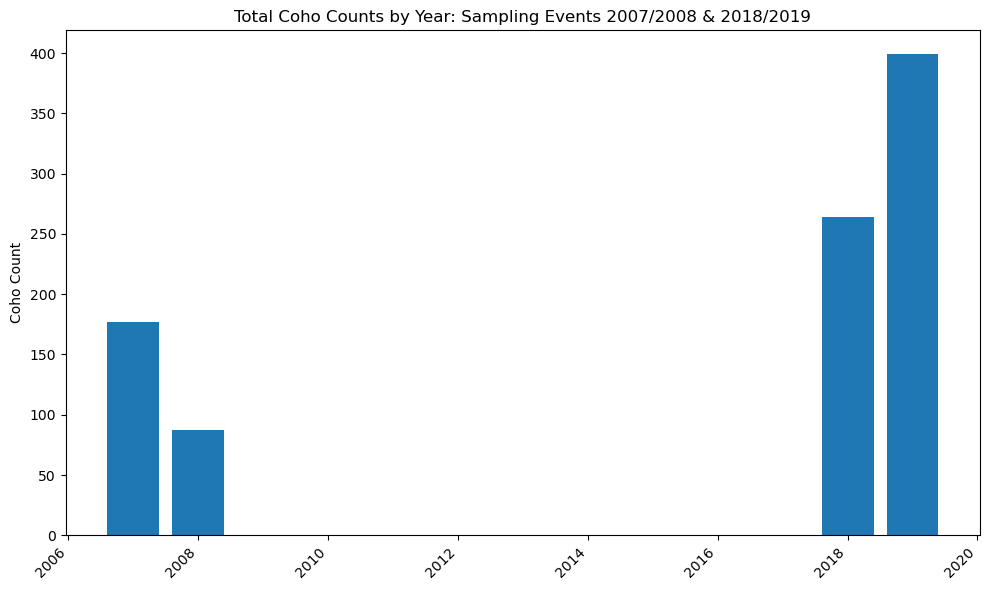

In [14]:
# Aggregate counts by reach
agg_coho = salmon_df.groupby('Year').sum().reset_index()

# Create simple bar plot to view data
plt.figure(figsize=(10,6)) 
plt.bar(agg_coho['Year'], agg_coho['Coho_count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Coho Count')
plt.title('Total Coho Counts by Year: Sampling Events 2007/2008 & 2018/2019')
plt.tight_layout()
plt.show()

In [15]:
# Define path to your CSV file for location data
data_dir = r"C:\Users\nymve\Documents\education\earth-data-analytics\fall-2025\data"

# Load river breaks csv file
salmon_river_breaks_df = pd.read_csv(os.path.join(data_dir, "Elwha_Riverscape_reach_breaks.csv"))

# Inspect the columns and first few rows
print(salmon_river_breaks_df.columns)
print(salmon_river_breaks_df.head())

Index(['reach_break', 'UTM_easting', 'UTM_northing'], dtype='object')
              reach_break  UTM_easting  UTM_northing
0    Upstream end of ED12  458573.7715   5327163.719
1   Between 12OB and ED12  458484.5947   5327680.985
2  Downstream end of OBMO  457748.4038   5332815.109
3     Between AR and MB01  456972.3517   5323727.975
4   Between MB01 and FBMB  456362.8259   5322506.673


In [ ]:
# Convert to tuples: (Easting, Northing) **this code created with the help of ChatGPT**
#break_coords = {
   # row['reach_break']: (row['UTM_easting'], row['UTM_northing'])
    #for _, row in salmon_river_breaks_df.iterrows()
#}

# Define reaches manually based on salmon table reach codes
# Example: "ED12 to 12OB" → upstream, downstream break names
#reach_lines = [
    #("ED12 to 12OB", "Upstream end of ED12", "Between 12OB and ED12"),
    #("12OB to OBMO", "Between 12OB and ED12", "Downstream end of OBMO"),
    # Add all other reaches here...
#]

# Create LineString geometries
#line_geoms = []
#reach_names = []

#for reach_name, upstream_break, downstream_break in reach_lines:
   # start = break_coords[upstream_break]
   # end = break_coords[downstream_break]
   # line = LineString([start, end])
   # line_geoms.append(line)
   # reach_names.append(reach_name)

# Make a GeoDataFrame
#lines_gdf = gpd.GeoDataFrame({
    #'Reach_Name': reach_names,
    #'geometry': line_geoms
#}, crs="EPSG:32610") # Assuming your UTM coordinates are in zone 10N

# Quick check
#print(lines_gdf)


     Reach_Name                                           geometry
0  ED12 to 12OB  LINESTRING (458573.772 5327163.719, 458484.595...
1  12OB to OBMO  LINESTRING (458484.595 5327680.985, 457748.404...


In [ ]:
# Check in correct crs
#print(lines_gdf.crs)

EPSG:32610


In [ ]:
# Dissolve all reaches into a single geometry
#dissolved_gdf = lines_gdf.dissolve(by=None, as_index=False)

# Quick check
#print(dissolved_gdf)

   index                                           geometry    Reach_Name
0      0  MULTILINESTRING ((458573.772 5327163.719, 4584...  ED12 to 12OB


In [ ]:
# Add the dissolved geometry to each year
#year_summary['geometry'] = dissolved_gdf.geometry.iloc[0]

# Convert to GeoDataFrame
#salmon_by_year_gdf = gpd.GeoDataFrame(year_summary, geometry='geometry', crs=lines_gdf.crs)

#print(salmon_by_year_gdf)

   Year  Coho_count  Coho_per_km  \
0  2007         177     6.064110   
1  2008          87     2.527071   
2  2018         264     4.416936   
3  2019         399     7.010217   

                                            geometry  
0  MULTILINESTRING ((458573.772 5327163.719, 4584...  
1  MULTILINESTRING ((458573.772 5327163.719, 4584...  
2  MULTILINESTRING ((458573.772 5327163.719, 4584...  
3  MULTILINESTRING ((458573.772 5327163.719, 4584...  


In [ ]:
#total_salmon_by_year_gdf = salmon_by_year_gdf.to_crs(elwha_gdf.crs)

#total_salmon_by_year_gdf

,Year,Coho_count,Coho_per_km,geometry
0,2007,177,6.064110,"MULTILINESTRING ((-123.55638 48.09639, -123.55..."
1,2008,87,2.527071,"MULTILINESTRING ((-123.55638 48.09639, -123.55..."
2,2018,264,4.416936,"MULTILINESTRING ((-123.55638 48.09639, -123.55..."
3,2019,399,7.010217,"MULTILINESTRING ((-123.55638 48.09639, -123.55..."


### Join USGS Salmon data with USGS Elwha River Watershed Boundary

In [ ]:
#print(total_salmon_by_year_gdf.crs)
#print(elwha_gdf.crs)

EPSG:4269
EPSG:4269


In [22]:
# Spatially join both geodataframes together
salmon_elwha_watershed_gdf = (
    elwha_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(total_salmon_by_year_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        total_salmon_by_year_gdf,
        # Use inner join to include only observations inside a defined ecoregion
        how='inner', 
        # Use contains to identify which ecoregion polygon each observation is within
        predicate='intersects')
)

# Call joined geodataframes
salmon_elwha_watershed_gdf

,name,geometry,index_right,Year,Coho_count,Coho_per_km
huc,,,,,,
171100200514,Lake Aldwell-Elwha River,"POLYGON ((-123.5546 48.14748, -123.55447 48.14...",0,2007,177,6.064110
171100200514,Lake Aldwell-Elwha River,"POLYGON ((-123.5546 48.14748, -123.55447 48.14...",1,2008,87,2.527071
171100200514,Lake Aldwell-Elwha River,"POLYGON ((-123.5546 48.14748, -123.55447 48.14...",2,2018,264,4.416936
171100200514,Lake Aldwell-Elwha River,"POLYGON ((-123.5546 48.14748, -123.55447 48.14...",3,2019,399,7.010217


In [30]:
# Spatially join both geodataframes together
salmon_elwha_watershed_gdf = (
    elwha_gdf
    # Find ecoregion for each observation
    .sjoin(
        salmon_year_summary,
        # Use inner join to include only observations inside a defined ecoregion
        how='inner', 
        # Use contains to identify which ecoregion polygon each observation is within
        predicate='intersects')
)

# Call joined geodataframes
salmon_elwha_watershed_gdf

ValueError: 'right_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

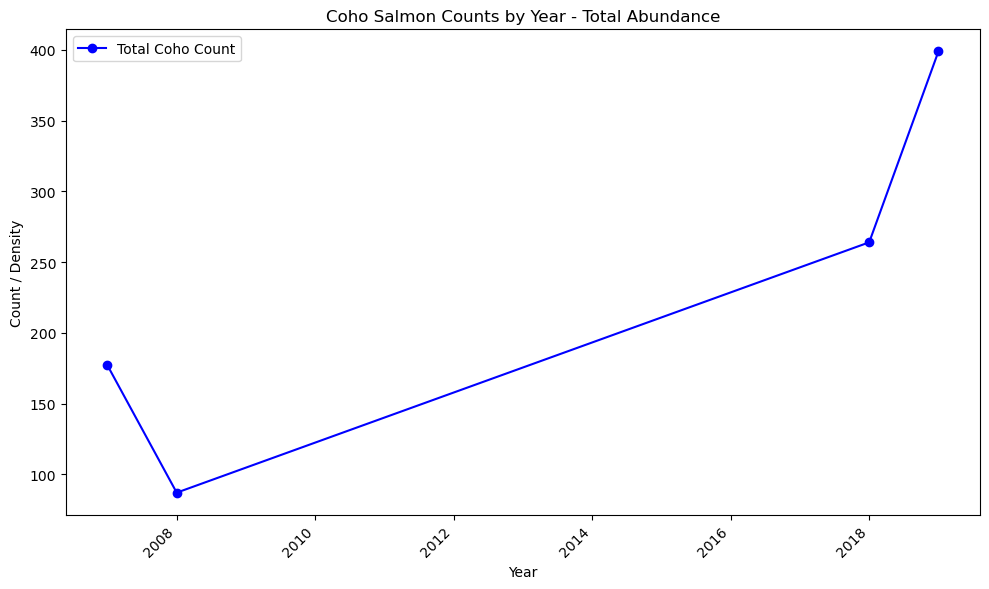

In [24]:
# Plot data on line grapn by year
salmon_plot_df = salmon_elwha_watershed_gdf.sort_values('Year')

# Set figure size
plt.figure(figsize=(10,6))

# Plot total Coho count
plt.plot(
    salmon_plot_df['Year'], 
    salmon_plot_df['Coho_count'], 
    marker='o', linestyle='-', color='blue', label='Total Coho Count'
)

# Set plot parameters
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Count / Density')
plt.title('Coho Salmon Counts by Year - Total Abundance')
plt.legend()
plt.tight_layout()

# Display plot
plt.show()


In [ ]:
# Plot Coho Salmon density

In [ ]:
# Create interactive plot showing salmon before and after dam removal
salmon_elwha_watershed_gdf.hvplot(
    geo=True,
    title='Elwha River Coho Salmon Recovery - Before/After Dam Removal in 2012-2014',                    
    tiles='EsriImagery',          # Insert underlying map
    color='Coho_per_km',          # Color by density
    line_width=5,                # Thickness of river line
    hover_cols=['Year', 'Coho_count', , 'Coho_per_km'], # Info when hovering
    frame_width=700,
    frame_height=500,              
    by='Year',                    # Separate layers by year
    slider=True                   # Add a year slider                   
)

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .NdOverlay.I :NdOverlay   [Year]
      :Polygons   [Longitude,Latitude]   (Coho_per_km,Year,Coho_count)

In [ ]:
# Create slider map **this code created with help of ChatGPT**
pn.extension('bokeh')

def plot_year(year):
    df = salmon_elwha_watershed_gdf[salmon_elwha_watershed_gdf['Year'] == year]
    return df.hvplot(
        geo=True,
        tiles='EsriImagery',
        color='Coho_per_km',
        line_width=5,
        hover_cols=['Year', 'Coho_count', 'Coho_per_km'],
        frame_width=700,
        frame_height=500,
        clim=(0, 160)
    )

slider = pn.widgets.IntSlider(name='Year', start=2007, end=2019, step=1, value=2007)
interactive_map = pn.bind(plot_year, year=slider)
pn.Column(slider, interactive_map).servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'4f2c9edd-9a94-469a-b64d-dcd8a721306e': {'version…

IndexError: list index out of range